# Telecom Churn Prediction 

```
The objectives of this project are:-
1. Perform exploratory analysis and extract insights from the dataset.
2. Split the dataset into train/test sets and explain your reasoning.
3. Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
4. Establish metrics to evaluate model performance.
5. Discuss the potential issues with deploying the model into production
```

### Import the required libraries

In [69]:
# python version # 3.8.2
import pandas as pd 
import numpy as np 
from pandas_profiling import ProfileReport 
from pycaret.classification import * 
from sklearn import metrics 
import os 
from sklearn.model_selection import train_test_split 

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
# option to display all columns
pd.set_option('display.max_columns', None)

In [72]:
# Read the data
telecom_churn = pd.read_csv('data science challenge.csv')

In [73]:
telecom_churn.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


### Check the Shape and Column types of the Dataframe

In [74]:
telecom_churn.shape

(3333, 21)

In [75]:
telecom_churn.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### Exploratory Analysis

In [76]:
# No missing values in the data.
# Scaling of numeric columns is required
telecom_churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [77]:
# Format the column names, remove space and special characters in column names
telecom_churn.columns =  telecom_churn.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [78]:
telecom_churn

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [79]:
#telecom_churn["area_code"] = telecom_churn["area_code"].astype('category')

In [80]:
profile = ProfileReport(telecom_churn, title = "Telecom Churn Report")

In [81]:
# create report for EDA
profile.to_widgets()

In [82]:
#save the profile report
profile.to_file("telecom_churn_eda.html")

In [83]:
[telecom_churn.churn.value_counts()]

[False    2850
 True      483
 Name: churn, dtype: int64]

In [84]:
pd.crosstab(telecom_churn.churn, telecom_churn.	customer_service_calls,margins=True, margins_name="Total")

customer_service_calls,0,1,2,3,4,5,6,7,8,9,Total
churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
Total,697,1181,759,429,166,66,22,9,2,2,3333


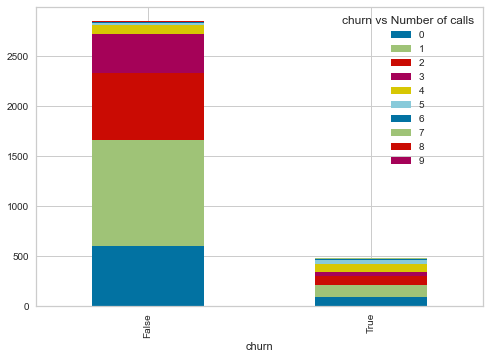

In [86]:
import matplotlib.pyplot as plt
ct = pd.crosstab(telecom_churn.churn, telecom_churn.customer_service_calls)
ct.plot.bar(stacked=True)
plt.legend(title='churn vs Number of calls')
plt.show()

<AxesSubplot:>

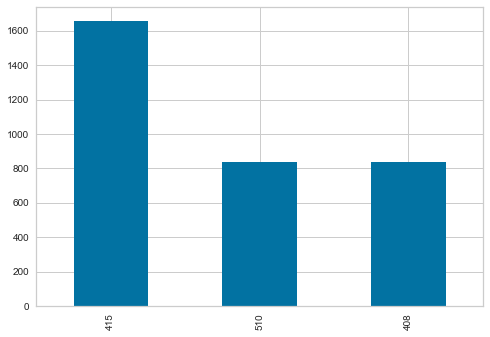

In [87]:
telecom_churn['area_code'].value_counts().plot.bar()

<AxesSubplot:>

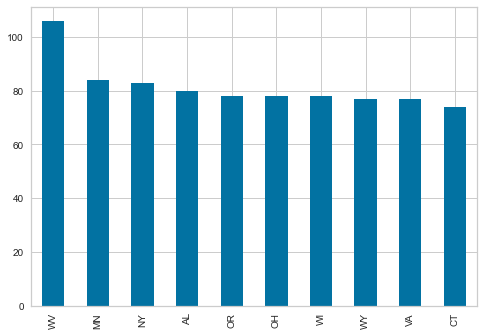

In [88]:
telecom_churn['state'].value_counts().head(10).plot.bar()

<AxesSubplot:>

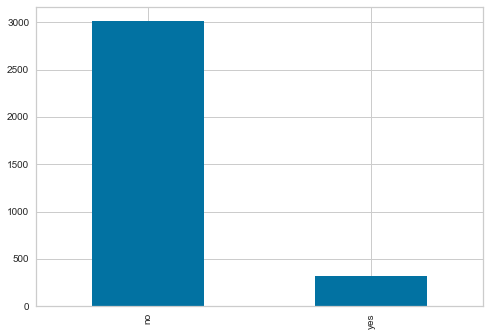

In [89]:
telecom_churn['international_plan'].value_counts().plot.bar()

<AxesSubplot:>

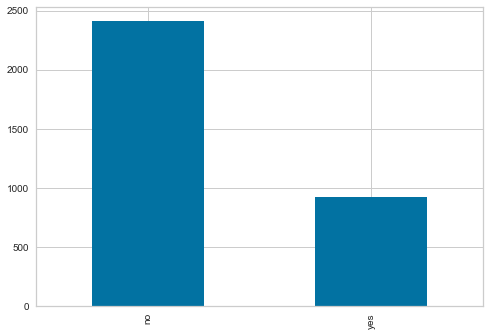

In [90]:
telecom_churn['voice_mail_plan'].value_counts().plot.bar()

### Observations from EDA are:-

1.  Dataset is **imbalanced - 85.5% customers did not churn and 14.5% customers churned**
2.  **State consist of 51 distinct values with high cardinality**
3.  **Numeric variables** are in different ranges and needs to be **scaled**
4.  Three distinct area codes - Area code '415' is 49.7%, rest two area codes are equally distributed
5.   **Distinct values of phone number is equal to the length of the dataset. This will be equivalent to primary key of the dataset. Not be included in modelling**
6.   72.3% customers did not activate their voicemail plan. This is verified by equal number of customers with zero number of voice messages
7.   **Total international calls and customer service calls data is skewed. This is verified by high kurtosis and skewness.**
8.  **All the other numeric variables are following normal distribution as verified by kurtosis / skewness values and histogram**

### Split the Data for Training and Testing

The **Machine learning algorithm should not be exposed to test data**. The performance of the learning algorithm can only be measured by testing on unseen data. To achieve the same a train and test split with 95% and 5% is created. It is ensured that the **sampling is stratified so that the proportion of churn and not churn customers are equal in train and test data.** As the amount of data is very less, only 5% of the data is kept aside for testing.Further the **train data is further split into train and validation set** with 90% and 10%. **Validation set is required for hyperparameter tuning.As validation set is also exposed    to training algorithm, it is also should not be used for model validation. Model validation is done on test set only.**

In [91]:
# convert the target value to integers. 
telecom_churn['churn'] = telecom_churn['churn'] * 1

In [92]:
train, test = train_test_split(telecom_churn, test_size = 0.05, stratify = telecom_churn['churn']) 
print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(test.shape))

Data for Modeling: (3166, 21)
Unseen Data For Predictions: (167, 21)


In [93]:
# Test the proportion of churn in train and test sets
train.churn.value_counts()

0    2707
1     459
Name: churn, dtype: int64

In [94]:
# 16.5% of the customers churned in train data
(459/2707)*100

16.956039896564462

In [95]:
test.churn.value_counts()

0    143
1     24
Name: churn, dtype: int64

In [96]:
# 16.7% of the customers churned in test data
(24/143)*100
# customers churned proportionally from train and test data

16.783216783216783

### Modelling with Pycaret

1. Train and validation sets are created with 90 % and 10 % data. 
2. The random seed selected for the modeling is 786
3. In this step we are normalizing the data, ignoring the variable 'phone number' for analysis 
4. Fixing the imbalance in the data using [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) method 
5. We are [transforming](https://pycaret.org/transformation/) the features - Changing the distribution of variables to a normal or approximate normal distribution
6. [Ignorning features with low variance](https://pycaret.org/ignore-low-variance/) - This will ignore variables (multi level categorical) where a single level dominates and there is not much variation in the information provided by the feature
7. The setup is inferring the customer_service_calls as numeric (as there are only ten distinct values). Hence explicitly mentioning it as numeric

In [97]:
exp_clf =    setup(data = train, target = 'churn', session_id = 786, 
                   train_size = 0.9,
                   normalize = True,
                   transformation = True,
                   ignore_low_variance = True,               
                   ignore_features = ['phone_number'],
                   fix_imbalance = True,
                   high_cardinality_features = ['state'],
                   numeric_features = ['customer_service_calls'])               

Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3166, 21)"
4,Missing Values,False
5,Numeric Features,15
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [98]:
compare_models(fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.9512,0.9127,0.7771,0.8732,0.8213,0.7932,0.7957,0.1908
1,Extreme Gradient Boosting,0.9488,0.9145,0.7675,0.8652,0.8124,0.7829,0.7854,0.2130
2,CatBoost Classifier,0.9466,0.9140,0.7577,0.8583,0.8041,0.7734,0.7759,4.3314
3,Extra Trees Classifier,0.9333,0.9032,0.6535,0.8544,0.7392,0.7018,0.7109,0.1456
4,Random Forest Classifier,0.9330,0.9082,0.7045,0.8147,0.7529,0.7145,0.7186,0.0366
5,Gradient Boosting Classifier,0.9308,0.9078,0.7674,0.7618,0.7635,0.7230,0.7238,1.1674
6,Decision Tree Classifier,0.8929,0.8227,0.7238,0.6106,0.6616,0.5986,0.6022,0.0356
7,Ada Boost Classifier,0.8645,0.8464,0.6003,0.5325,0.5625,0.4829,0.4853,0.2996
8,Naive Bayes,0.8284,0.7894,0.6439,0.4430,0.5233,0.4237,0.4355,0.0028
9,K Neighbors Classifier,0.7715,0.7897,0.6878,0.3531,0.4664,0.3398,0.3705,0.0160


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=786, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Creating the models for top performing algorithms based on Precision and AUC. Tree based models are performing well on this dataset

In [99]:
lightgbm = create_model('lightgbm', fold =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9526,0.9008,0.8171,0.8481,0.8323,0.8047,0.8049
1,0.9561,0.9271,0.8193,0.8718,0.8447,0.8192,0.8197
2,0.9544,0.9241,0.8072,0.8701,0.8375,0.8110,0.8118
3,0.9544,0.9278,0.7470,0.9254,0.8267,0.8007,0.8068
4,0.9385,0.8836,0.6951,0.8507,0.7651,0.7301,0.7351
Mean,0.9512,0.9127,0.7771,0.8732,0.8213,0.7932,0.7957
SD,0.0065,0.0176,0.0488,0.0278,0.0287,0.0321,0.0307


In [100]:
catboost = create_model('catboost', fold =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9421,0.9161,0.7439,0.8356,0.7871,0.7537,0.7554
1,0.9456,0.9254,0.7711,0.8421,0.8050,0.7735,0.7745
2,0.9561,0.9198,0.8313,0.8625,0.8466,0.8210,0.8212
3,0.9544,0.9314,0.7470,0.9254,0.8267,0.8007,0.8068
4,0.9350,0.8775,0.6951,0.8261,0.7550,0.7178,0.7214
Mean,0.9466,0.9140,0.7577,0.8583,0.8041,0.7734,0.7759
SD,0.0078,0.0190,0.0443,0.0356,0.0317,0.0360,0.0358


In [101]:
xgboost = create_model('xgboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9080,0.8171,0.8171,0.8171,0.7863,0.7863
1,0.9561,0.9270,0.8072,0.8816,0.8428,0.8173,0.8184
2,0.9474,0.9231,0.7590,0.8630,0.8077,0.7773,0.7795
3,0.9509,0.9393,0.7470,0.8986,0.8158,0.7877,0.7922
4,0.9420,0.8752,0.7073,0.8657,0.7785,0.7455,0.7506
Mean,0.9488,0.9145,0.7675,0.8652,0.8124,0.7829,0.7854
SD,0.0047,0.0220,0.0404,0.0272,0.0206,0.0230,0.0218


In [102]:
rf = create_model('rf', fold =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9298,0.8986,0.7317,0.7692,0.7500,0.7092,0.7095
1,0.9263,0.9227,0.7349,0.7531,0.7439,0.7009,0.7009
2,0.9281,0.9091,0.6867,0.7917,0.7355,0.6941,0.6965
3,0.9421,0.9291,0.7349,0.8472,0.7871,0.7538,0.7563
4,0.9385,0.8817,0.6341,0.9123,0.7482,0.7145,0.7298
Mean,0.9330,0.9082,0.7045,0.8147,0.7529,0.7145,0.7186
SD,0.0062,0.0170,0.0396,0.0583,0.0178,0.0208,0.0221


In [103]:
et = create_model('et', fold =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9175,0.8940,0.6463,0.7465,0.6928,0.6455,0.6477
1,0.9404,0.9064,0.6988,0.8657,0.7733,0.7394,0.7451
2,0.9404,0.9096,0.6747,0.8889,0.7671,0.7337,0.7428
3,0.9456,0.9307,0.6867,0.9194,0.7862,0.7558,0.7664
4,0.9227,0.8754,0.5610,0.8519,0.6765,0.6347,0.6525
Mean,0.9333,0.9032,0.6535,0.8544,0.7392,0.7018,0.7109
SD,0.0111,0.0183,0.0494,0.0586,0.0453,0.0510,0.0503


### Tune the created models for selecting the best hyperparameters

In [104]:
tuned_lightgbm = tune_model(lightgbm, optimize = 'F1', n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9404,0.9034,0.7805,0.8000,0.7901,0.7554,0.7554
1,0.9439,0.8894,0.8049,0.8049,0.8049,0.7721,0.7721
2,0.9579,0.9525,0.8537,0.8537,0.8537,0.8291,0.8291
3,0.9649,0.9000,0.8049,0.9429,0.8684,0.8483,0.8519
4,0.9474,0.9161,0.8049,0.8250,0.8148,0.7841,0.7842
5,0.9614,0.9198,0.8049,0.9167,0.8571,0.8349,0.8373
6,0.9684,0.9594,0.8810,0.9024,0.8916,0.8731,0.8732
7,0.9649,0.9162,0.7619,1.0000,0.8649,0.8451,0.8554
8,0.9333,0.8673,0.7381,0.7949,0.7654,0.7266,0.7273
9,0.9437,0.9092,0.6829,0.9032,0.7778,0.7462,0.7558


In [105]:
tuned_catboost = tune_model(catboost, optimize = 'F1', n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9368,0.8919,0.7317,0.8108,0.7692,0.7328,0.7341
1,0.9474,0.9042,0.7805,0.8421,0.8101,0.7796,0.7804
2,0.9509,0.9510,0.8049,0.8462,0.8250,0.7964,0.7968
3,0.9544,0.8872,0.7561,0.9118,0.8267,0.8007,0.8053
4,0.9474,0.9258,0.8049,0.8250,0.8148,0.7841,0.7842
5,0.9544,0.9058,0.8049,0.8684,0.8354,0.8090,0.8098
6,0.9579,0.9607,0.7619,0.9412,0.8421,0.8181,0.8242
7,0.9439,0.9133,0.6667,0.9333,0.7778,0.7467,0.7605
8,0.9193,0.8823,0.7143,0.7317,0.7229,0.6757,0.6757
9,0.9437,0.8767,0.7073,0.8788,0.7838,0.7518,0.7577


In [106]:
tuned_xgboost = tune_model(xgboost, optimize = 'F1', n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.8786,0.7805,0.8421,0.8101,0.7796,0.7804
1,0.9474,0.8737,0.7805,0.8421,0.8101,0.7796,0.7804
2,0.9509,0.9396,0.8293,0.8293,0.8293,0.8006,0.8006
3,0.9684,0.9017,0.8049,0.9706,0.8800,0.8620,0.8670
4,0.9509,0.9386,0.7805,0.8649,0.8205,0.7921,0.7935
5,0.9544,0.9125,0.7561,0.9118,0.8267,0.8007,0.8053
6,0.9439,0.9686,0.7381,0.8611,0.7949,0.7626,0.7656
7,0.9614,0.9216,0.7857,0.9429,0.8571,0.8350,0.8397
8,0.9263,0.8634,0.6905,0.7838,0.7342,0.6916,0.6935
9,0.9366,0.9118,0.6829,0.8485,0.7568,0.7208,0.7264


In [107]:
tuned_rf = tune_model(rf, optimize = 'F1', n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9368,0.8803,0.7561,0.7949,0.7750,0.7383,0.7386
1,0.9368,0.9106,0.8049,0.7674,0.7857,0.7487,0.7490
2,0.9439,0.9287,0.8049,0.8049,0.8049,0.7721,0.7721
3,0.9614,0.9113,0.7805,0.9412,0.8533,0.8313,0.8362
4,0.9439,0.9427,0.8049,0.8049,0.8049,0.7721,0.7721
5,0.9368,0.8999,0.7561,0.7949,0.7750,0.7383,0.7386
6,0.9439,0.9418,0.7143,0.8824,0.7895,0.7575,0.7631
7,0.9509,0.9113,0.7143,0.9375,0.8108,0.7832,0.7927
8,0.9263,0.8532,0.6905,0.7838,0.7342,0.6916,0.6935
9,0.9437,0.8886,0.6829,0.9032,0.7778,0.7462,0.7558


In [108]:
tuned_et = tune_model(et, optimize = 'F1' , n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9158,0.8828,0.6341,0.7429,0.6842,0.6360,0.6386
1,0.9298,0.8971,0.6829,0.8000,0.7368,0.6966,0.6996
2,0.9263,0.9369,0.6585,0.7941,0.7200,0.6780,0.6819
3,0.9509,0.8955,0.7317,0.9091,0.8108,0.7830,0.7891
4,0.9368,0.9228,0.6829,0.8485,0.7568,0.7210,0.7266
5,0.9439,0.8852,0.7073,0.8788,0.7838,0.7520,0.7578
6,0.9474,0.9410,0.7381,0.8857,0.8052,0.7751,0.7794
7,0.9439,0.9394,0.6429,0.9643,0.7714,0.7409,0.7607
8,0.9123,0.8558,0.5476,0.7931,0.6479,0.5997,0.6131
9,0.9120,0.8913,0.4878,0.8333,0.6154,0.5695,0.5956


### Create an Ensemble, Blended and Stack model to see the performance

In [109]:
dt = create_model('dt' , fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8895,0.8289,0.7439,0.5922,0.6595,0.5945,0.6000
1,0.8912,0.8314,0.7470,0.6019,0.6667,0.6026,0.6076
2,0.8877,0.8094,0.6988,0.5979,0.6444,0.5783,0.5807
3,0.9035,0.8536,0.7831,0.6373,0.7027,0.6458,0.6507
4,0.8928,0.7903,0.6463,0.6235,0.6347,0.5719,0.5721
Mean,0.8929,0.8227,0.7238,0.6106,0.6616,0.5986,0.6022
SD,0.0055,0.0214,0.0471,0.0170,0.0234,0.0260,0.0274


In [110]:
tuned_dt = tune_model(dt, optimize = 'F1', n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9018,0.8782,0.7805,0.6275,0.6957,0.6379,0.6433
1,0.8842,0.9037,0.8049,0.5690,0.6667,0.5991,0.6123
2,0.8982,0.9072,0.8780,0.6000,0.7129,0.6537,0.6712
3,0.9053,0.8717,0.7805,0.6400,0.7033,0.6476,0.6521
4,0.9193,0.8988,0.8049,0.6875,0.7416,0.6941,0.6971
5,0.9018,0.9168,0.8537,0.6140,0.7143,0.6569,0.6699
6,0.9439,0.9188,0.8333,0.7955,0.8140,0.7809,0.7812
7,0.9298,0.8626,0.7381,0.7750,0.7561,0.7151,0.7154
8,0.9053,0.8125,0.6667,0.6829,0.6747,0.6193,0.6193
9,0.9190,0.8680,0.7073,0.7250,0.7160,0.6688,0.6689


In [111]:
bagged_dt = ensemble_model(tuned_dt, n_estimators = 200, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8807,0.8698,0.7805,0.5614,0.6531,0.5833,0.5949
1,0.9298,0.9043,0.8293,0.7234,0.7727,0.7315,0.7338
2,0.9053,0.9175,0.9024,0.6167,0.7327,0.6776,0.6957
3,0.9404,0.9077,0.8049,0.7857,0.7952,0.7603,0.7604
4,0.9298,0.9073,0.8537,0.7143,0.7778,0.7365,0.7406
5,0.9123,0.9220,0.8293,0.6538,0.7312,0.6796,0.6865
6,0.9509,0.9436,0.8810,0.8043,0.8409,0.8119,0.8131
7,0.9509,0.9128,0.7857,0.8684,0.8250,0.7965,0.7979
8,0.9088,0.8489,0.7381,0.6739,0.7045,0.6507,0.6517
9,0.9401,0.8935,0.7561,0.8158,0.7848,0.7501,0.7508


In [112]:
boosted_dt = ensemble_model(tuned_dt, method = 'Boosting', n_estimators = 50, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8877,0.8717,0.5610,0.6216,0.5897,0.5249,0.5258
1,0.9123,0.8352,0.6341,0.7222,0.6753,0.6249,0.6266
2,0.9333,0.9076,0.7073,0.8056,0.7532,0.7149,0.7169
3,0.9404,0.8308,0.6829,0.8750,0.7671,0.7335,0.7409
4,0.9053,0.8260,0.6098,0.6944,0.6494,0.5949,0.5965
5,0.9333,0.9336,0.7317,0.7895,0.7595,0.7209,0.7216
6,0.9228,0.8915,0.6429,0.7941,0.7105,0.6666,0.6715
7,0.9018,0.8379,0.4524,0.7917,0.5758,0.5248,0.5512
8,0.9263,0.8179,0.6190,0.8387,0.7123,0.6712,0.6814
9,0.9085,0.8018,0.5610,0.7419,0.6389,0.5876,0.5952


In [113]:
# Train a voting classifier with all models in the library
blender = blend_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8912,0.0000,0.7561,0.5962,0.6667,0.6028,0.6088
1,0.9404,0.0000,0.7805,0.8000,0.7901,0.7554,0.7554
2,0.9158,0.0000,0.6829,0.7179,0.7000,0.6511,0.6513
3,0.9474,0.0000,0.7805,0.8421,0.8101,0.7796,0.7804
4,0.9263,0.0000,0.7561,0.7381,0.7470,0.7039,0.7039
5,0.9158,0.0000,0.7073,0.7073,0.7073,0.6581,0.6581
6,0.9404,0.0000,0.7857,0.8049,0.7952,0.7603,0.7604
7,0.9474,0.0000,0.7619,0.8649,0.8101,0.7797,0.7818
8,0.9018,0.0000,0.7143,0.6522,0.6818,0.6239,0.6248
9,0.9190,0.0000,0.7317,0.7143,0.7229,0.6755,0.6755


In [114]:
blender_specific = blend_models(estimator_list = [tuned_lightgbm,tuned_xgboost,
                                                 tuned_rf, tuned_et, tuned_dt], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9404,0.8833,0.7805,0.8000,0.7901,0.7554,0.7554
1,0.9404,0.9079,0.7805,0.8000,0.7901,0.7554,0.7554
2,0.9474,0.9345,0.8293,0.8095,0.8193,0.7885,0.7886
3,0.9684,0.8996,0.8049,0.9706,0.8800,0.8620,0.8670
4,0.9509,0.9361,0.8049,0.8462,0.8250,0.7964,0.7968
5,0.9474,0.9149,0.8293,0.8095,0.8193,0.7885,0.7886
6,0.9544,0.9541,0.7857,0.8919,0.8354,0.8091,0.8113
7,0.9579,0.9318,0.7381,0.9688,0.8378,0.8142,0.8241
8,0.9298,0.8511,0.6905,0.8056,0.7436,0.7032,0.7060
9,0.9437,0.8926,0.7073,0.8788,0.7838,0.7518,0.7577


In [115]:
stacked_models = stack_models(estimator_list = [tuned_lightgbm,tuned_catboost,tuned_xgboost,
                                                 tuned_rf, tuned_et, tuned_dt], meta_model = None, optimize = 'F1', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9368,0.9035,0.8293,0.7556,0.7907,0.7536,0.7547
1,0.9579,0.9200,0.8434,0.8642,0.8537,0.8291,0.8292
2,0.9509,0.9184,0.8434,0.8235,0.8333,0.8045,0.8046
3,0.9614,0.9347,0.8434,0.8861,0.8642,0.8417,0.8421
4,0.9315,0.8787,0.7561,0.7654,0.7607,0.7207,0.7208
Mean,0.9477,0.9111,0.8231,0.8190,0.8205,0.7899,0.7903
SD,0.0117,0.0189,0.0339,0.0519,0.0391,0.0459,0.0458


### Out of all the models created tuned_lightgbm is performing better on validation data

In [163]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Test the model on the test data and choose the best performing model

### Evaluate Model

In [116]:
# create funtion to return evaluation metrics
def evaluation_metrics(model):
    check_model = predict_model(model, data = test)
    print(metrics.confusion_matrix(check_model.churn,check_model.Label))
    tn, fp, fn, tp = metrics.confusion_matrix(check_model.churn,check_model.Label).ravel()
    Accuracy = round((tp+tn)/(tp+tn+fp+fn),3)
    precision = round(tp/(tp+fp),3)
    specificity = round(tn/(tn+fp),3)
    recall = round(tp/(tp+fn),3)
    print( f"Accuracy:{Accuracy} , Specificity:{specificity}, Precision:{precision} , Recall:{recall}")

#### check tuned_lightgbm

In [158]:
evaluation_metrics(tuned_lightgbm)

[[142   1]
 [  5  19]]
Accuracy:0.964 , Specificity:0.993, Precision:0.95 , Recall:0.792


#### check tuned_catboost

In [118]:
evaluation_metrics(tuned_catboost)

[[141   2]
 [  5  19]]
Accuracy:0.958 , Specificity:0.986, Precision:0.905 , Recall:0.792


#### check tuned_xgboost

In [119]:
evaluation_metrics(tuned_xgboost)

[[141   2]
 [  5  19]]
Accuracy:0.958 , Specificity:0.986, Precision:0.905 , Recall:0.792


#### check tuned_rf

In [120]:
evaluation_metrics(tuned_rf)

[[141   2]
 [  6  18]]
Accuracy:0.952 , Specificity:0.986, Precision:0.9 , Recall:0.75


#### check tuned_et

In [121]:
evaluation_metrics(tuned_et)

[[143   0]
 [ 11  13]]
Accuracy:0.934 , Specificity:1.0, Precision:1.0 , Recall:0.542


#### check tuned_dt

In [122]:
evaluation_metrics(tuned_dt)

[[141   2]
 [  6  18]]
Accuracy:0.952 , Specificity:0.986, Precision:0.9 , Recall:0.75


#### check boosted_dt

In [123]:
evaluation_metrics(boosted_dt)

[[141   2]
 [ 10  14]]
Accuracy:0.928 , Specificity:0.986, Precision:0.875 , Recall:0.583


#### check bagged_dt

In [124]:
evaluation_metrics(bagged_dt)

[[139   4]
 [  6  18]]
Accuracy:0.94 , Specificity:0.972, Precision:0.818 , Recall:0.75


#### check blender

In [125]:
evaluation_metrics(blender)

[[143   0]
 [ 11  13]]
Accuracy:0.934 , Specificity:1.0, Precision:1.0 , Recall:0.542


#### check blender_specific

In [126]:
evaluation_metrics(blender_specific)

[[142   1]
 [  5  19]]
Accuracy:0.964 , Specificity:0.993, Precision:0.95 , Recall:0.792


#### check stacked_models

In [127]:
evaluation_metrics(stacked_models)

[[139   4]
 [  4  20]]
Accuracy:0.952 , Specificity:0.972, Precision:0.833 , Recall:0.833


### Finalizing the Model and Metrics

1.  Compared multiple models to examine which algorithm is suitable for this dataset
2.  Chose the five best performing algorithms and created models for them
3.  Hyper parameter tuning was done to further improve the model performance
4.  Ensemble of models were created to check their performance on test data
5.  All the tuned and esemble models were tested out on unseen data to finalize a model

### Model finalization
My recommendation for the final model is tuned_lightgbm. This is because the models predictions for churned customers is very high. From my experience in media Industry, it was observed that business users usually request for model explainability. This model's Recall is slightly lower than stacked_models. stacked_model was not selected because it does not provide model interpretation. Also given similar performance it is better to go for simpler model. 

In [148]:
# Finalize the model
final_model = finalize_model(tuned_lightgbm)

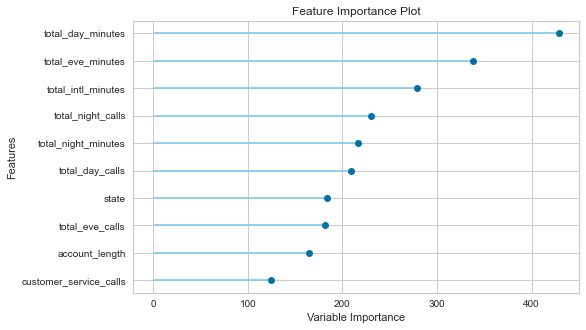

In [146]:
# Feature importance using decision tree models
plot_model(final_model, plot = 'feature')

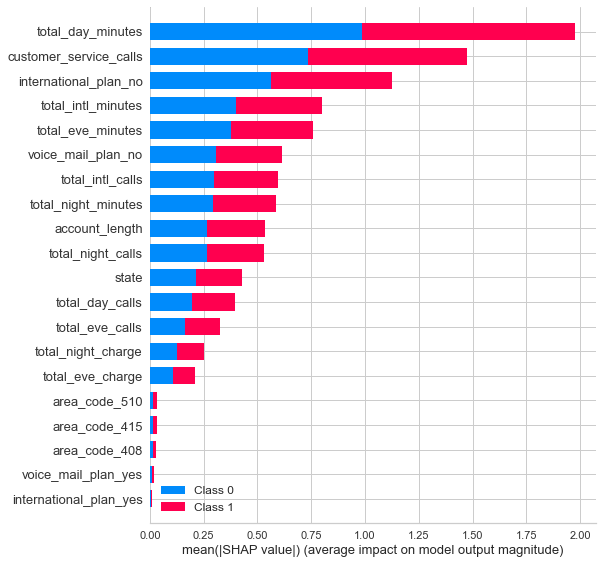

In [147]:
# Feature importance using Shap
interpret_model(final_model, plot = 'summary')


In [149]:
# local interpretation
interpret_model(final_model, plot = 'reason', observation = 14)

In [150]:
# save the model
save_model(final_model,'tuned_lightgbm_dt_save_20201017')

Transformation Pipeline and Model Succesfully Saved


In [151]:
# load the model
loaded_model = load_model('bagged_dt_save_20201017')

Transformation Pipeline and Model Sucessfully Loaded


### Potential issues with deploying the model into production are:-

1.  Data and model versioning   As the amount of data is increasing every day, a mechanism to version data along with code needs to be established. This needs to be done without any cost overhead for storing multiple copies of the same data.
2.  Tracking and storing of experiment results and artifacts efficiently. Data scientist should be able to tell which version of model is presently in production, data used for training, what are the evaluation metrics of the model at any given time.
3.  Monitoring of models in production for data drift - The behaviour of incoming data may change and will may differ from the data on which it was trained
4.  Taking care of CI/CD in production - As soon as a better performing model is finalized and commited, it should go to production in an automated fashion
5.  Instead of full-deployment of the models - Canary or Blue-Green deployment should be done. If model should be exposed to 10% to 15% of the population. If it performs well on a small population, then it should be rolled out for everyone.
6.  Feedback loops - The data used by the model for prediction going again into the training set

The following **tools which can be used for the production issues mentioned above:-**
1. Data and model versioning - **Data Version Control (DVC) and MLOps by DVC**
2. Tracking experiments - **mlflow** python package
3. Monitoring of models in production - Bi tools
4. Containerization - **Docker and Kubernetes**
5. CI/CD - **Github, CircleCI, MLops**
6. Deployment - **Seldon core, Heroku**
7. Canary / Bluegreen Deployment - **AWS Sagemaker**

### Appendix

If the business priorirty is to predict both churners and non-churners accurately then Accuracy. If the business priority is to identify churners then precision and recall. If the business priority is to predict non-churners (which is a very rare scenario) then it is specificity.
The final model will be chosen as per business priority. If the business priority is :-
1.  Predicting both **churn and non-churning customers accurately then the model with highest accuracy will be chosen i.e - tuned_dt**
2.  Maximizing the **proportion of churner identifications which are actually correct, then model with highest precision - tuned_dt**
3.  Identifying the **Maximum proportion of actual churners then model with highest recall - bagged_dt (as this is simpler than blender_specific)**

In [137]:
# Data for DOE
doe = predict_model(loaded_model, data = telecom_churn)
print(metrics.confusion_matrix(doe.churn,doe.Label))

[[2821   29]
 [ 135  348]]


In [138]:
tn, fp, fn, tp = metrics.confusion_matrix(doe.churn,doe.Label).ravel()
Accuracy = round((tp+tn)/(tp+tn+fp+fn),3)
precision = round(tp/(tp+fp),3)
specificity = round(tn/(tn+fp),3)
recall = round(tp/(tp+fn),3)
print( f"Accuracy:{Accuracy} , Specificity:{specificity}, Precision:{precision} , Recall:{recall}")

Accuracy:0.951 , Specificity:0.99, Precision:0.923 , Recall:0.72


In [139]:
doe.shape

(3333, 23)

In [140]:
doe.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [141]:
93/483

0.19254658385093168